In [1]:
#Plot of confirmed Corona cases in selected countries.
#Last update: 2020-03-11, JL

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#https://github.com/CSSEGISandData/COVID-19
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'

In [2]:
df = pd.read_csv(url,index_col=None)
df=df.drop(['Lat','Long'],axis=1)
df=df.set_index([*df.columns[:2]])
df=df.stack().reset_index()
df.columns=['state','country','date','cases']
df.date=pd.to_datetime(df.date)
df.head()

,state,country,date,cases
0,NaN,Thailand,2020-01-22,2
1,NaN,Thailand,2020-01-23,3
2,NaN,Thailand,2020-01-24,5
3,NaN,Thailand,2020-01-25,7
4,NaN,Thailand,2020-01-26,8


In [3]:
allCountries=sorted(df.country.unique())
for a,b,c in zip(allCountries[::3],allCountries[1::3],allCountries[2::3]):
    print('{:<30}{:<30}{:<}'.format(a,b,c))

Afghanistan                   Albania                       Algeria
Andorra                       Argentina                     Armenia
Australia                     Austria                       Azerbaijan
Bahrain                       Bangladesh                    Belarus
Belgium                       Bhutan                        Bolivia
Bosnia and Herzegovina        Brazil                        Brunei
Bulgaria                      Burkina Faso                  Cambodia
Cameroon                      Canada                        Chile
China                         Colombia                      Congo (Kinshasa)
Costa Rica                    Cote d'Ivoire                 Croatia
Cruise Ship                   Cyprus                        Czechia
Denmark                       Dominican Republic            Ecuador
Egypt                         Estonia                       Finland
France                        French Guiana                 Georgia
Germany                       Greece  

In [22]:
plotCountries=['Germany','Italy','Spain','Iran','Japan','Portugal', 'Korea, South']
ix=df.country.isin(plotCountries)
plotStartDate=pd.to_datetime('2020-02-20')

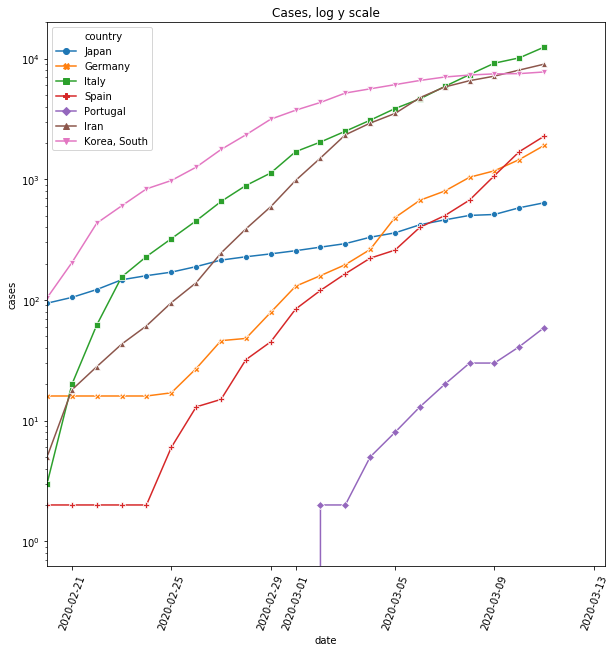

In [23]:
plt.subplots(figsize=(10,10))
g=sns.lineplot(data=df[ix],
             x='date',
             y='cases',
            hue='country',
               style='country',
              dashes=False,
              markers=True)
ax = g.axes
ax.set_yscale('log')
plt.title('Cases, log y scale')
plt.xlim(left=plotStartDate)
plt.xticks(rotation=70);

In [24]:
df.date.max()

Timestamp('2020-03-11 00:00:00')

Note similar slopes of european countries. Italy took of earlier

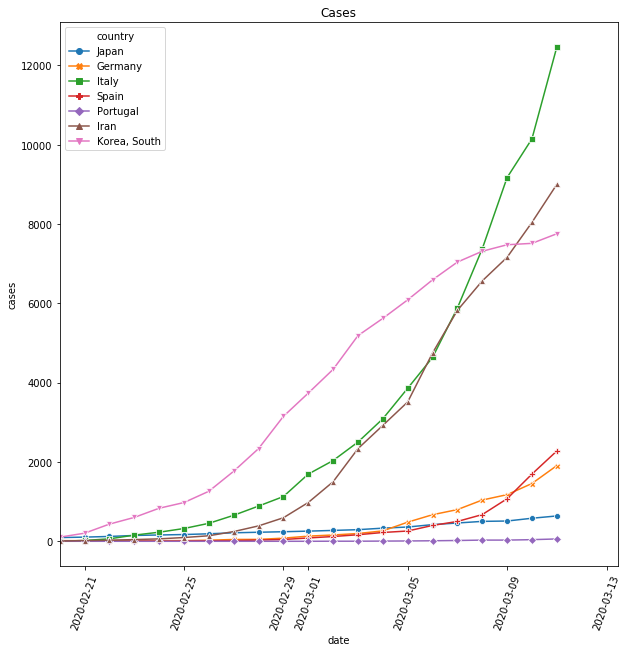

In [25]:
plt.subplots(figsize=(10,10))
g=sns.lineplot(data=df[ix],
             x='date',
             y='cases',
            hue='country',
               style='country',
              dashes=False,
              markers=True)

plt.title('Cases');
plt.xticks(rotation=70);
plt.xlim(left=plotStartDate);

In [26]:
ix=df.country.isin([plotCountries[0]])
df.loc[ix][-3:]

,state,country,date,cases
597,NaN,Germany,2020-03-09,1176
598,NaN,Germany,2020-03-10,1457
599,NaN,Germany,2020-03-11,1908


# Plot cases aligned to date of crossing 100 cases

Text(0.5, 0, 'days since 100 cases')

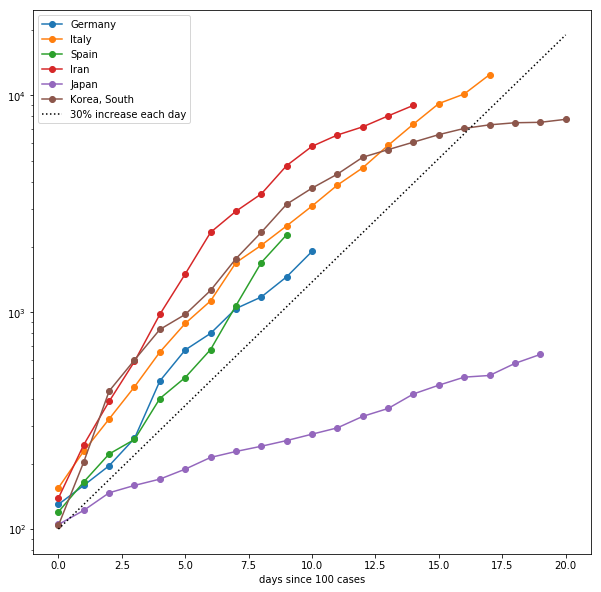

In [27]:
fix,ax=plt.subplots(figsize=(10,10))


for i,c in enumerate(plotCountries):
    ix=df.country==c
    ts=df[ix].cases.values
    if ts[-1]>100:
        inflect=np.argmax(ts>100)
        ax.plot(ts[inflect:],'o-',label=c)
    
t=np.linspace(0,20,100)
e=100*(1+0.3)**t
ax.plot(t,e,':k',label='30% increase each day')
ax.set_yscale('log')
plt.legend()
plt.xlabel('days since 100 cases')